In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, xlim
from scipy.ndimage import label

# Number of agents
N = 1000

# initial wealth condition
xMin = 90
xMax = 100
agents = np.random.uniform(xMax,xMin,N)
agents_start = agents.copy()


In [ ]:
# First simulation
# 2.1 Basic model without saving, and Boltzmann distribution

# first case dx = const
agents = agents_start

transConstant = 35
dx = np.random.uniform(xMin,xMax)/transConstant

iterNum = 100000
for k in range(iterNum):
    x_i = np.random.randint(0, N)
    x_j = np.random.randint(0, N)

    if agents[x_i] == 0 or 0 == agents[x_j]:
        continue

    agents[x_i] = agents[x_i] + dx
    agents[x_j] = agents[x_j] - dx

    if agents[x_j] < 0:
        agents[x_j] = 0

In [ ]:
# visualise
plt.hist(agents, bins=25)
plt.show()

In [ ]:
# second case dx is not constant
agents = agents_start

iterNum = 100000
for k in range(iterNum):
    x_i = np.random.randint(0, N)
    x_j = np.random.randint(0, N)

    if agents[x_i] == 0 or 0 == agents[x_j]:
        continue

    eps = np.random.uniform(0,1)

    old_i = agents[x_i]
    old_j = agents[x_j]

    agents[x_i] = (old_j + old_i)*eps
    agents[x_j] = (old_j + old_i)*(1 - eps)



In [ ]:
# visualise
plt.hist(agents, bins=20)
plt.show()


In [ ]:
# Second simulation
# 2.3 Model with constant global saving propensity: Gamma distribution

agents = agents_start
agentsResult = np.zeros((1, N))

# saving propensity lambda
lams = np.array([0.95, 0.85, 0.75, 0.65, 0.55, 0.45, 0.35, 0.25, 0.15, 0.05])

xAvg = np.sum(agents)/N
D = 2*(1 + 2*lams)/(1 - lams)
T = 2*xAvg/D
selectedAgents = np.array([251, 251, 251, 251, 251, 251, 251, 251, 251, 251])

iterNum = 10000

xResponse = np.zeros((len(lams),iterNum))
cnt = 0
num = 5

for lam in lams:
    if len(selectedAgents) != len(lams):
        break

    for k in range(iterNum):
        x_i = np.random.randint(0, N)
        x_j = np.random.randint(0, N)

        if agents[x_i] == 0 or agents[x_j] == 0:
            continue
        #xResponse[cnt,k] = agents[selectedAgents[cnt]]/T[cnt]
        xResponse[cnt,k] = agents[selectedAgents[cnt]]

        eps = np.random.uniform(0,1)

        old_i = agents[x_i]
        old_j = agents[x_j]

        agents[x_i] =lam*old_i + (old_j + old_i)*eps*(1 - lam)
        agents[x_j] = lam*old_j + (old_j + old_i)*(1 - eps)*(1 - lam)

    if cnt == num:
        agentsResult = agents

    cnt += 1


In [ ]:
# visualise
plt.hist(agentsResult, bins=15)
plt.show()

In [ ]:
# Further analise of model with global saving propensities

# Visualise D_lambda
lambdaVec = np.linspace(0, 1-0.001, 1000)
dLambda = 2*(1 + 2*lambdaVec)/(1 - lambdaVec)

figure(1)
plt.plot(lambdaVec, dLambda)
plt.xlabel(r'$\lambda$')
plt.ylabel(r'$D_\lambda$')
plt.title("Effective dimension")
plt.xlim([0,1])
plt.ylim([0, 100])
plt.show()

# Visualise T_lambda

tLambda = (1 - lambdaVec)/(1 + 2*lambdaVec)

figure(1)
plt.plot(lambdaVec, tLambda)
plt.xlabel(r'$\lambda$')
plt.ylabel(r'$\frac{T_\lambda}{\langle x \rangle}$')
plt.title("Effective temperature")
plt.xlim([0,1])
plt.ylim([0,1])
plt.show()


In [ ]:
# Analise of two different agents with different lambdas during time
figure(1)
time = np.linspace(0,iterNum,iterNum)
plt.plot(time, xResponse[0,:], label=str(lams[0]))
plt.plot(time, xResponse[7,:],'--', label=str(lams[7]))

plt.xlabel("time(iterations)")
plt.ylabel(r'$\frac{x}{T}$')
plt.title("Wealth during time")
plt.legend()
plt.show()


In [ ]:
stdVec = np.zeros(len(lams))
meanVec = np.zeros(len(lams))
for i in range(len(lams)):
    stdVec[i] = np.std(xResponse[i,:])

coeffs = np.polyfit(lams, stdVec, 1)
yFit = np.polyval(coeffs, lams)


figure(1)
plt.scatter(lams,stdVec)
plt.plot(lams,yFit)
plt.title("Standard deviation")
plt.xlabel(r'$\lambda$')
plt.ylabel("std")
plt.show()


In [ ]:
# Third simulation
# 2.4 Model with individual saving propensities: Pareto tail

agents = agents_start.copy()
agentsResultTwo = np.zeros(N)

# saving propensity lambda
lam_vec = np.random.uniform(0,1,N)

iterNum = 100000
kLam = 10


for j in range(kLam):
    lam_vec = np.random.uniform(0,1,N)
    for k in range(iterNum):
        x_i = np.random.randint(0, N)
        x_j = np.random.randint(0, N)

        if agents[x_i] == 0 or 0 == agents[x_j]:
            continue

        eps = np.random.uniform(0,1)

        old_i = agents[x_i]
        old_j = agents[x_j]

        agents[x_i] =lam_vec[x_i]*old_i + eps*((1 - lam_vec[x_i])*old_i + (1 - lam_vec[x_j])*old_j)
        agents[x_j] = lam_vec[x_j]*old_j + (1 - eps)*((1 - lam_vec[x_i])*old_i + (1 - lam_vec[x_j])*old_j)

    agentsResultTwo += agents

#agentsResultTwo = agentsResultTwo/kLam
#plt.hist(agentsResultTwo, bins=15)
#plt.show()

print(agentsResultTwo.size)


In [ ]:
# visualise
figure(1)
plt.hist(agents, bins=15)
plt.show()

In [ ]:
# Further analysis of the model with individual saving propensities
# x-h correlation

lam_vec = np.random.uniform(0,1,N)
iterNum = 10**6

agents = agents_start.copy()

plt.hist(agents)

for k in range(iterNum):
    x_i = np.random.randint(0, N)
    x_j = np.random.randint(0, N)

    if agents[x_i] == 0 or 0 == agents[x_j]:
        continue

    eps = np.random.uniform(0,1)

    old_i = agents[x_i]
    old_j = agents[x_j]

    agents[x_i] =lam_vec[x_i]*old_i + eps*((1 - lam_vec[x_i])*old_i + (1 - lam_vec[x_j])*old_j)
    agents[x_j] = lam_vec[x_j]*old_j + (1 - eps)*((1 - lam_vec[x_i])*old_i + (1 - lam_vec[x_j])*old_j)


In [49]:
# Finding <X(lambda)>

dec = 1
rLamVec = np.round(lam_vec, dec)

tmp = np.vstack((rLamVec, agents))

keys = tmp[0]
values = tmp[1]

uniqueKeys = np.unique(keys)
#sums = np.array([values[keys == k].sum()/np.sum(keys == k) for k in uniqueKeys])
sums = np.array([np.median(values[keys == k]) for k in uniqueKeys])


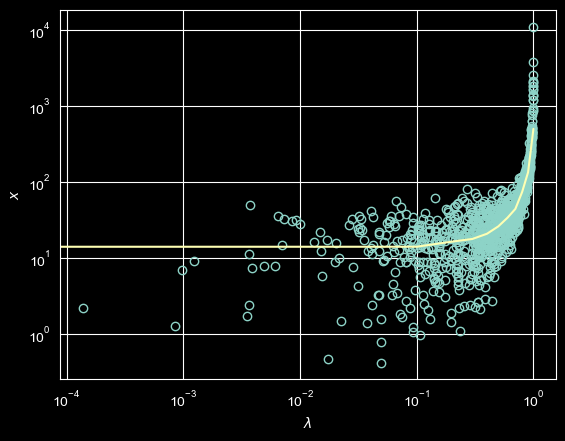

In [51]:
# visualise

figure(1)
plt.plot(lam_vec,agents,'o', markerfacecolor='none')
plt.plot(uniqueKeys, sums)
plt.xlabel(r'$\lambda$')
plt.yscale('log')
plt.xscale('log')
plt.ylabel(r'$x$')
plt.show()

